In [ ]:
# Appendix : Thematic Maps with results of algorithms 1,2,3 and 4
# Project website : http://emc2-dut.org/
# Data sample : XXX
# Author : Perez Joan*  (2024) 
# * UMR 7300 ESPACE-CNRS, Université Côte d'Azur, Nice, France.
#   Contact: Joan.PEREZ@univ-cotedazur.fr 
# Note : This script produces the maps published in [Perez and Fusco, 2024][ref.to.be.added]

In [1]:
# 0.1 Packages, local filepaths & parameters
import os
import pandas
import geopandas as gpd
import time
import contextily
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

In [2]:
# Specify the file path to both data samples
# DPC_59.gpkg
main_gpkg = "C:\\...\\DPC_59.gpkg"

administrative = gpd.read_file(main_gpkg, layer="adm_boundaries", engine='pyogrio', use_arrow=True)
# Read roads
road = gpd.read_file(main_gpkg, layer="road", engine='pyogrio', use_arrow=True)
road_CONN = gpd.read_file(main_gpkg, layer="road_LocRelCon", engine='pyogrio', use_arrow=True)
road_pop = gpd.read_file(main_gpkg, layer="road_pop_results", engine='pyogrio', use_arrow=True)
road_pop = gpd.sjoin(road_pop, administrative, how="inner", predicate="intersects")
# Read buildings
building = gpd.read_file(main_gpkg, layer="building", engine='pyogrio', use_arrow=True)
building_morpho = gpd.read_file(main_gpkg, layer="building_morpho", engine='pyogrio', use_arrow=True)
building_morpho = gpd.sjoin(building_morpho, administrative, how="inner", predicate="intersects")

# DPC_06.gpkg
main_gpkg2 = "C:\\...\\DPC_06.gpkg"

administrative2 = gpd.read_file(main_gpkg2, layer="adm_boundaries", engine='pyogrio', use_arrow=True)
# Read roads
road2 = gpd.read_file(main_gpkg2, layer="road", engine='pyogrio', use_arrow=True)
road_CONN2 = gpd.read_file(main_gpkg2, layer="road_LocRelCon", engine='pyogrio', use_arrow=True)
road_pop2 = gpd.read_file(main_gpkg2, layer="road_pop_results", engine='pyogrio', use_arrow=True)
road_pop2 = gpd.sjoin(road_pop2, administrative2, how="inner", predicate="intersects")
# Read buildings
building2 = gpd.read_file(main_gpkg2, layer="building", engine='pyogrio', use_arrow=True)
building_morpho2 = gpd.read_file(main_gpkg2, layer="building_morpho", engine='pyogrio', use_arrow=True)
building_morpho2 = gpd.sjoin(building_morpho2, administrative2, how="inner", predicate="intersects")

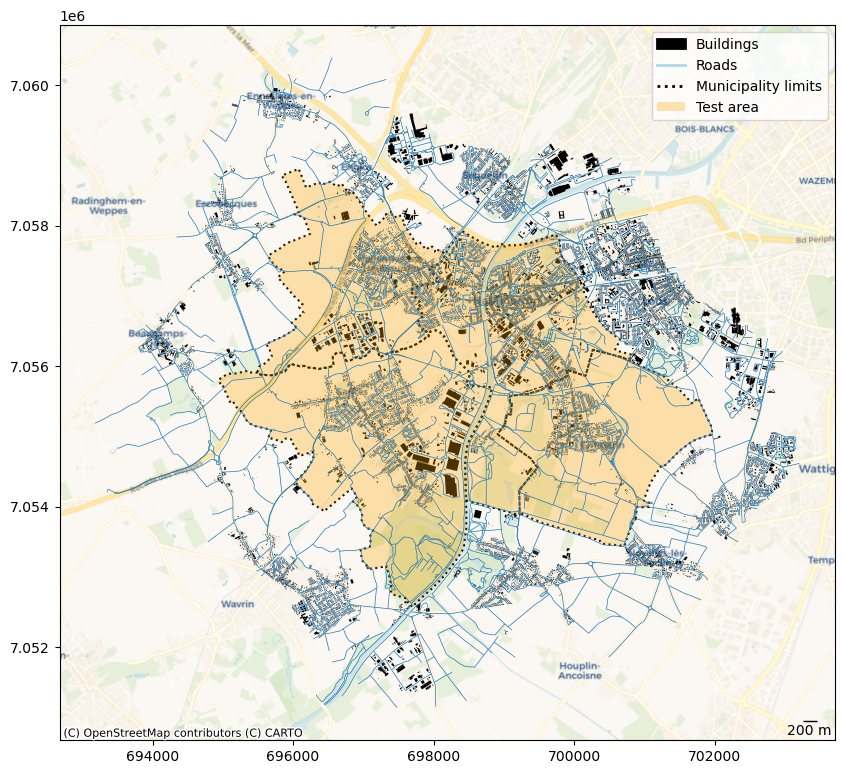

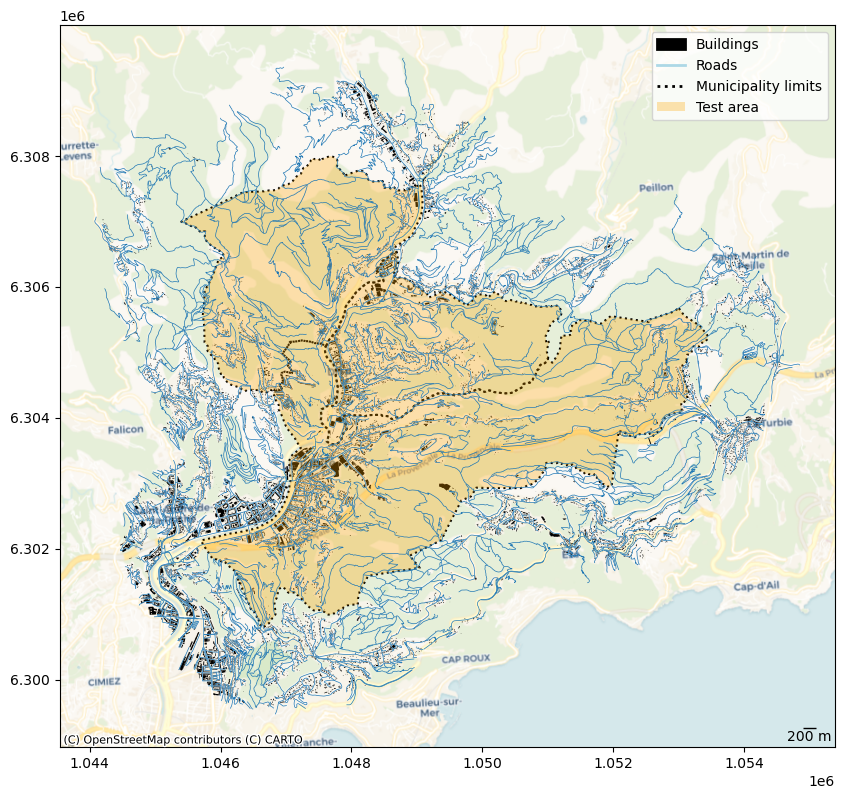

In [3]:
# Appendix A1 : Presentation Map
# Presentation Map
legend_handles = [
    plt.Rectangle((0, 0), 1, 1, color='black', lw=2, label='Buildings'),  # For buildings
    plt.Line2D([0], [0], color='lightblue', lw=2, label='Roads'), # For roads
    plt.Line2D([0], [0], color='black', lw=2, label='Municipality limits',  linestyle='dotted'), # For municipality limits
    plt.Rectangle((0, 0), 1, 1, color='orange', ec='none', label='Test area', alpha=0.3),
]
# Create a plot with building_clean
ax = building.plot(figsize=(10, 10), color='black')
# Plot road_clean on the same map
road.plot(ax=ax, linewidth=0.5)
# Plot adm boundaries
administrative.plot(ax=ax, facecolor='none', edgecolor='black', linestyle='dotted', linewidth=1.5)
administrative.plot(ax=ax, color='orange', alpha=0.3)
# Add title & legend
ax.legend(handles=legend_handles)
scalebar = AnchoredSizeBar(ax.transData, 200, '200 m', 'lower right', frameon=False)
ax.add_artist(scalebar)
# Add basemap
contextily.add_basemap(ax, crs=road.crs, source=contextily.providers.CartoDB.Voyager)

# Create a plot with building_clean
ax = building2.plot(figsize=(10, 10), color='black')
# Plot road_clean on the same map
road2.plot(ax=ax, linewidth=0.5)
# Plot adm boundaries
administrative2.plot(ax=ax, facecolor='none', edgecolor='black', linestyle='dotted', linewidth=1.5)
administrative2.plot(ax=ax, color='orange', alpha=0.3)
# Add title & legend
ax.legend(handles=legend_handles)
scalebar = AnchoredSizeBar(ax.transData, 200, '200 m', 'lower right', frameon=False)
ax.add_artist(scalebar)
# Add basemap
contextily.add_basemap(ax, crs=road.crs, source=contextily.providers.CartoDB.Voyager)

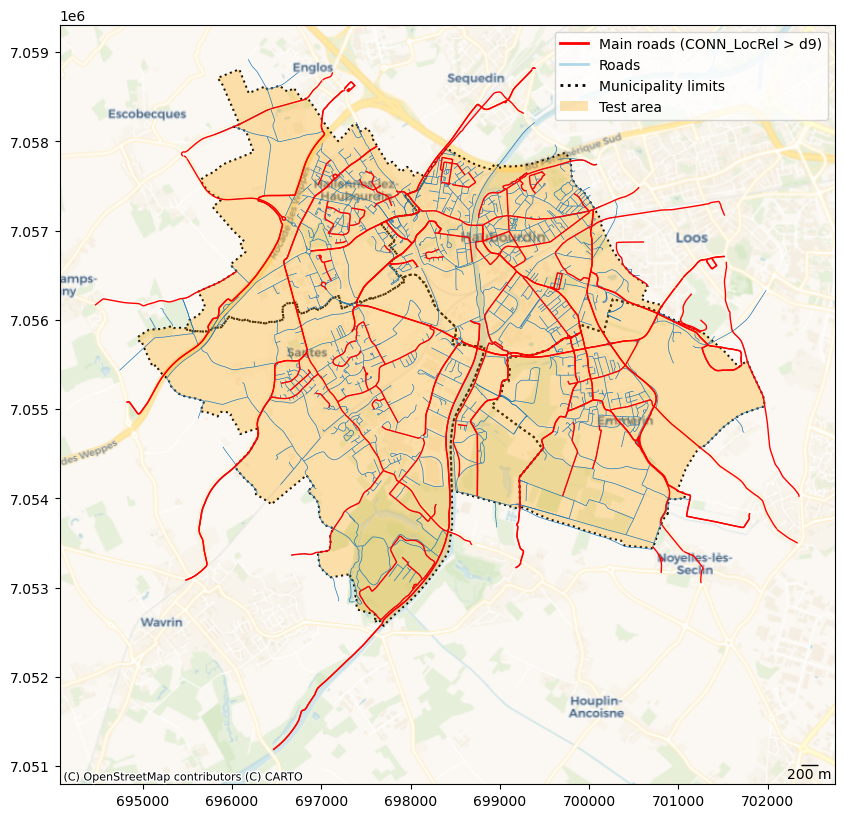

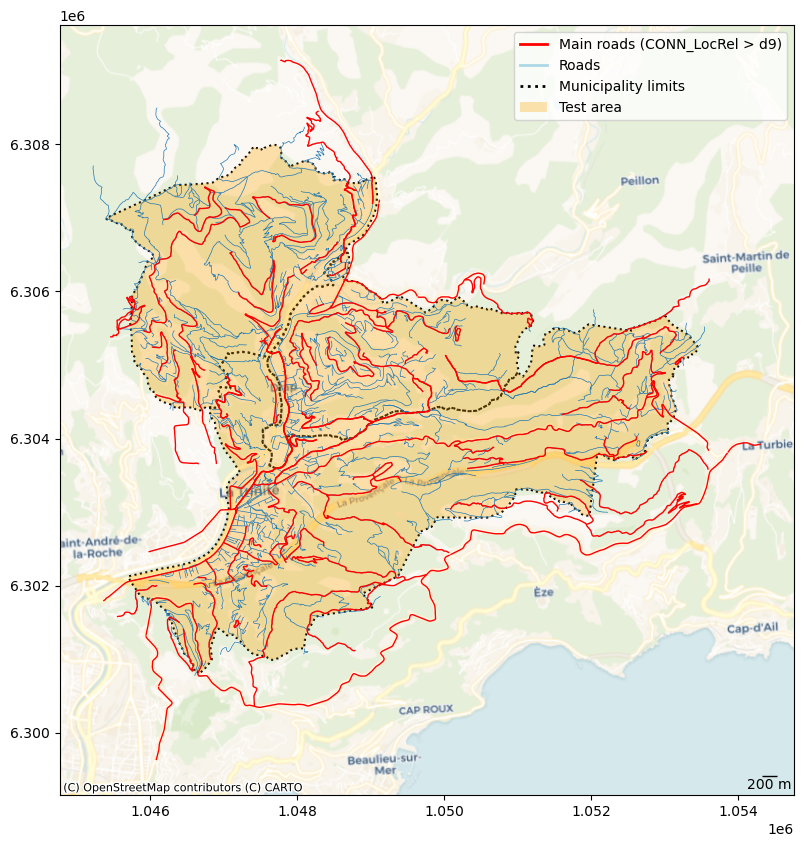

In [4]:
# Appendix A2 : Map of main roads
# Create custom legend handles
legend_handles = [
    plt.Line2D([0], [0], color='red', lw=2, label='Main roads (CONN_LocRel > d9)'), # For roads
    plt.Line2D([0], [0], color='lightblue', lw=2, label='Roads'), # For main roads
    plt.Line2D([0], [0], color='black', lw=2, label='Municipality limits',  linestyle='dotted'), # For municipality limits
    plt.Rectangle((0, 0), 1, 1, color='orange', ec='none', label='Test area', alpha=0.3),  # For activity areas
]

road = gpd.sjoin(road, administrative, how="inner", predicate="intersects")
road_CONN = gpd.sjoin(road_CONN, administrative, how="inner", predicate="intersects")

# Plot road_clean on the same map
ax = road.plot(figsize=(10, 10), linewidth=0.5)

d9 = road_CONN['LocRel_CONN'].quantile(0.9)
subset_road_CONN = road_CONN[road_CONN['LocRel_CONN'] >= d9]
subset_road_CONN.plot(ax=ax, edgecolor='red', linewidth=1)

# Plot adm boundaries
administrative.plot(ax=ax, facecolor='none', edgecolor='black', linestyle='dotted', linewidth=1.5)
administrative.plot(ax=ax, color='orange', alpha=0.3)
# Add title & legend
ax.legend(handles=legend_handles)
scalebar = AnchoredSizeBar(ax.transData, 200, '200 m', 'lower right', frameon=False)
ax.add_artist(scalebar)
# Add basemap
contextily.add_basemap(ax, crs=road.crs, source=contextily.providers.CartoDB.Voyager)


road2 = gpd.sjoin(road2, administrative2, how="inner", predicate="intersects")
road_CONN2 = gpd.sjoin(road_CONN2, administrative2, how="inner", predicate="intersects")

# Plot road_clean on the same map
ax = road2.plot(figsize=(10, 10), linewidth=0.5)

d9_2 = road_CONN2['LocRel_CONN'].quantile(0.9)
subset_road_CONN2 = road_CONN2[road_CONN2['LocRel_CONN'] >= d9_2]
subset_road_CONN2.plot(ax=ax, edgecolor='red', linewidth=1)

# Plot adm boundaries
administrative2.plot(ax=ax, facecolor='none', edgecolor='black', linestyle='dotted', linewidth=1.5)
administrative2.plot(ax=ax, color='orange', alpha=0.3)
# Add title & legend
ax.legend(handles=legend_handles)
scalebar = AnchoredSizeBar(ax.transData, 200, '200 m', 'lower right', frameon=False)
ax.add_artist(scalebar)
# Add basemap
contextily.add_basemap(ax, crs=road.crs, source=contextily.providers.CartoDB.Voyager)

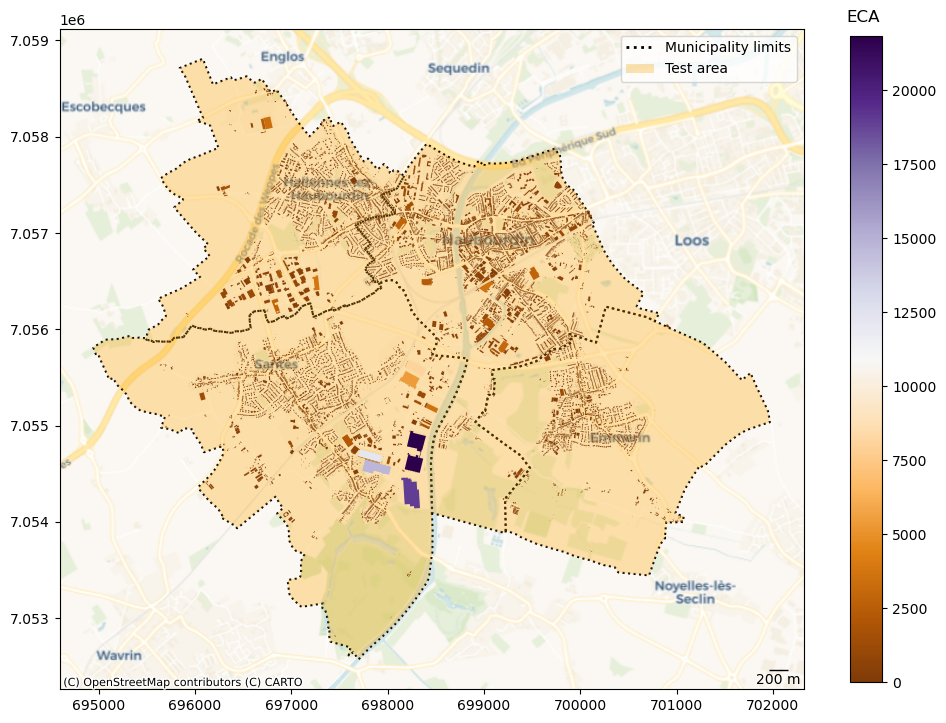

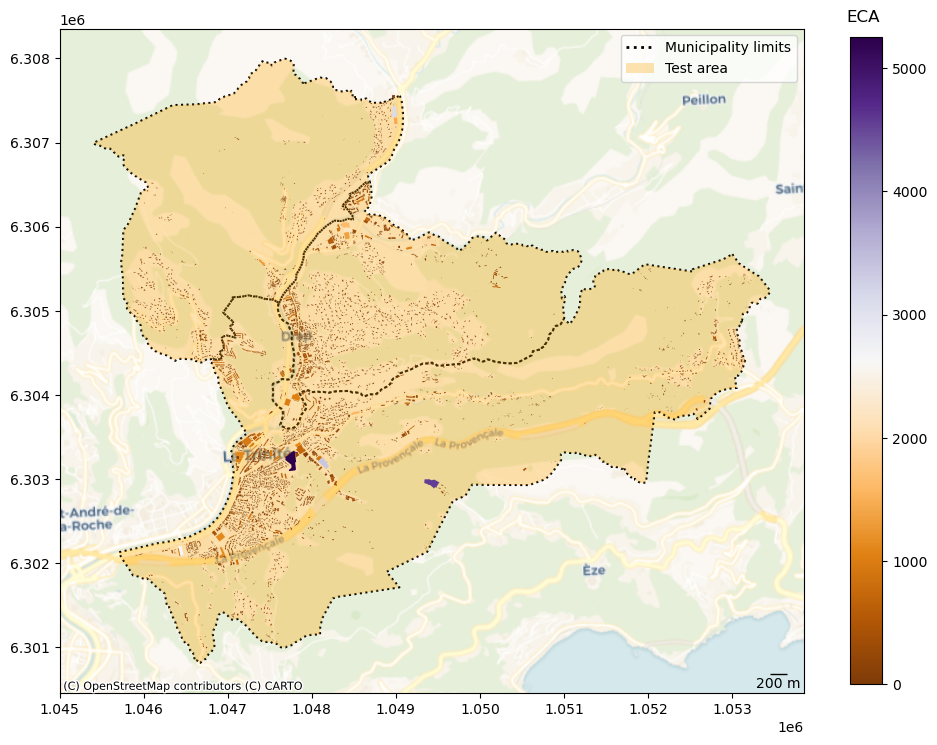

In [6]:
# Appendix A3 : Maps of a given morphological indicator (ECA in this example)
# Create custom legend handles
legend_handles = [
    plt.Line2D([0], [0], color='black', lw=2, label='Municipality limits',  linestyle='dotted'), # For municipality limits
    plt.Rectangle((0, 0), 1, 1, color='orange', ec='none', label='Test area', alpha=0.3), 
]

# Plot adm boundaries
ax = administrative.plot(figsize=(12, 12), facecolor='none', edgecolor='black', linestyle='dotted', linewidth=1.5)
administrative.plot(ax=ax, color='orange', alpha=0.3)
# Plot road_clean on the same map
building_morpho.plot(ax=ax, column='ECA', cmap='PuOr', legend=True, legend_kwds={'orientation': 'vertical', 'shrink': 0.7})
title = ax.set_title('ECA', fontsize=12, pad=5)
title.set_position([1.08, 0])  # Adjust the position of the title
# Add title & legend
ax.legend(handles=legend_handles)
scalebar = AnchoredSizeBar(ax.transData, 200, '200 m', 'lower right', frameon=False)
ax.add_artist(scalebar)
# Add basemap
contextily.add_basemap(ax, crs=road.crs, source=contextily.providers.CartoDB.Voyager)

# Plot adm boundaries
ax = administrative2.plot(figsize=(12, 12), facecolor='none', edgecolor='black', linestyle='dotted', linewidth=1.5)
administrative2.plot(ax=ax, color='orange', alpha=0.3)
# Plot road_clean on the same map
building_morpho2.plot(ax=ax, column='ECA', cmap='PuOr', legend=True, legend_kwds={'orientation': 'vertical', 'shrink': 0.7})
title2 = ax.set_title('ECA', fontsize=12, pad=5)
title2.set_position([1.08, 0])  # Adjust the position of the title
# Add title & legend
ax.legend(handles=legend_handles)
scalebar = AnchoredSizeBar(ax.transData, 200, '200 m', 'lower right', frameon=False)
ax.add_artist(scalebar)
# Add basemap
contextily.add_basemap(ax, crs=road.crs, source=contextily.providers.CartoDB.Voyager)

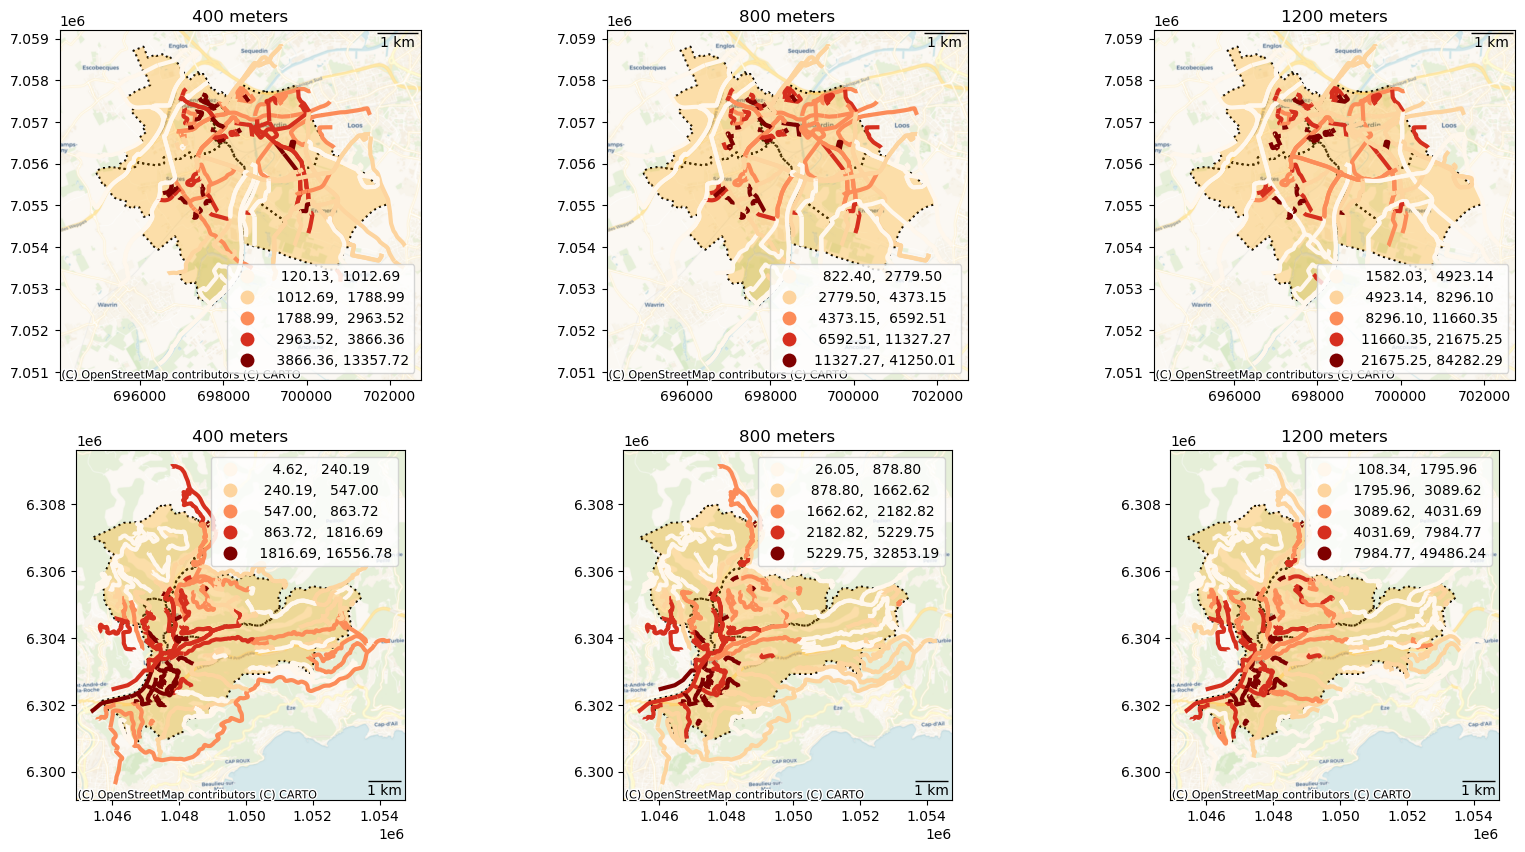

In [8]:
# Appendix A4 : Catchment area results
# Create custom legend handles
legend_handles = [
    Line2D([0], [0], color='black', lw=2, label='Municipality limits', linestyle='dotted'),  # For municipality limits
    Rectangle((0, 0), 1, 1, color='orange', ec='none', label='Test area', alpha=0.3),
]

# Plot road_clean on the same map
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 10))

# Plot first map
road_pop.plot(ax=ax1, linewidth=3, column='weighted400', cmap='OrRd', legend=True, scheme='quantiles', legend_kwds={'loc': 'lower right'})
administrative.plot(ax=ax1, facecolor='none', edgecolor='black', linestyle='dotted', linewidth=1.5)
administrative.plot(ax=ax1, color='orange', alpha=0.3)
scalebar1 = AnchoredSizeBar(ax1.transData, 1000, '1 km', 'upper right', frameon=False)
ax1.add_artist(scalebar1)
contextily.add_basemap(ax1, crs=road.crs, source=contextily.providers.CartoDB.Voyager)
ax1.set_title('400 meters')  # Add title for the first map

# Plot second map
road_pop.plot(ax=ax2, linewidth=3, column='weighted800', cmap='OrRd', legend=True, scheme='quantiles', legend_kwds={'loc': 'lower right'})
administrative.plot(ax=ax2, facecolor='none', edgecolor='black', linestyle='dotted', linewidth=1.5)
administrative.plot(ax=ax2, color='orange', alpha=0.3)
scalebar2 = AnchoredSizeBar(ax2.transData, 1000, '1 km', 'upper right', frameon=False)
ax2.add_artist(scalebar2)
contextily.add_basemap(ax2, crs=road.crs, source=contextily.providers.CartoDB.Voyager)
ax2.set_title('800 meters')  # Add title for the second map

# Plot third map
road_pop.plot(ax=ax3, linewidth=3, column='weighted1200', cmap='OrRd', legend=True, scheme='quantiles', legend_kwds={'loc': 'lower right'})
administrative.plot(ax=ax3, facecolor='none', edgecolor='black', linestyle='dotted', linewidth=1.5)
administrative.plot(ax=ax3, color='orange', alpha=0.3)
scalebar3 = AnchoredSizeBar(ax3.transData, 1000, '1 km', 'upper right', frameon=False)
ax3.add_artist(scalebar3)
contextily.add_basemap(ax3, crs=road.crs, source=contextily.providers.CartoDB.Voyager)
ax3.set_title('1200 meters')  # Add title for the third map

# Plot fourth map
road_pop2.plot(ax=ax4, linewidth=3, column='weighted400', cmap='OrRd', legend=True, scheme='quantiles')
administrative2.plot(ax=ax4, facecolor='none', edgecolor='black', linestyle='dotted', linewidth=1.5)
administrative2.plot(ax=ax4, color='orange', alpha=0.3)
scalebar1 = AnchoredSizeBar(ax4.transData, 1000, '1 km', 'lower right', frameon=False)
ax4.add_artist(scalebar1)
contextily.add_basemap(ax4, crs=road.crs, source=contextily.providers.CartoDB.Voyager)
ax4.set_title('400 meters')  # Add title for the first map

# Plot fifth map
road_pop2.plot(ax=ax5, linewidth=3, column='weighted800', cmap='OrRd', legend=True, scheme='quantiles')
administrative2.plot(ax=ax5, facecolor='none', edgecolor='black', linestyle='dotted', linewidth=1.5)
administrative2.plot(ax=ax5, color='orange', alpha=0.3)
scalebar2 = AnchoredSizeBar(ax5.transData, 1000, '1 km', 'lower right', frameon=False)
ax5.add_artist(scalebar2)
contextily.add_basemap(ax5, crs=road.crs, source=contextily.providers.CartoDB.Voyager)
ax5.set_title('800 meters')  # Add title for the second map

# Plot map number six
road_pop2.plot(ax=ax6, linewidth=3, column='weighted1200', cmap='OrRd', legend=True, scheme='quantiles')
administrative2.plot(ax=ax6, facecolor='none', edgecolor='black', linestyle='dotted', linewidth=1.5)
administrative2.plot(ax=ax6, color='orange', alpha=0.3)
scalebar3 = AnchoredSizeBar(ax6.transData, 1000, '1 km', 'lower right', frameon=False)
ax6.add_artist(scalebar3)
contextily.add_basemap(ax6, crs=road.crs, source=contextily.providers.CartoDB.Voyager)
ax6.set_title('1200 meters')  # Add title for the third map

plt.show()


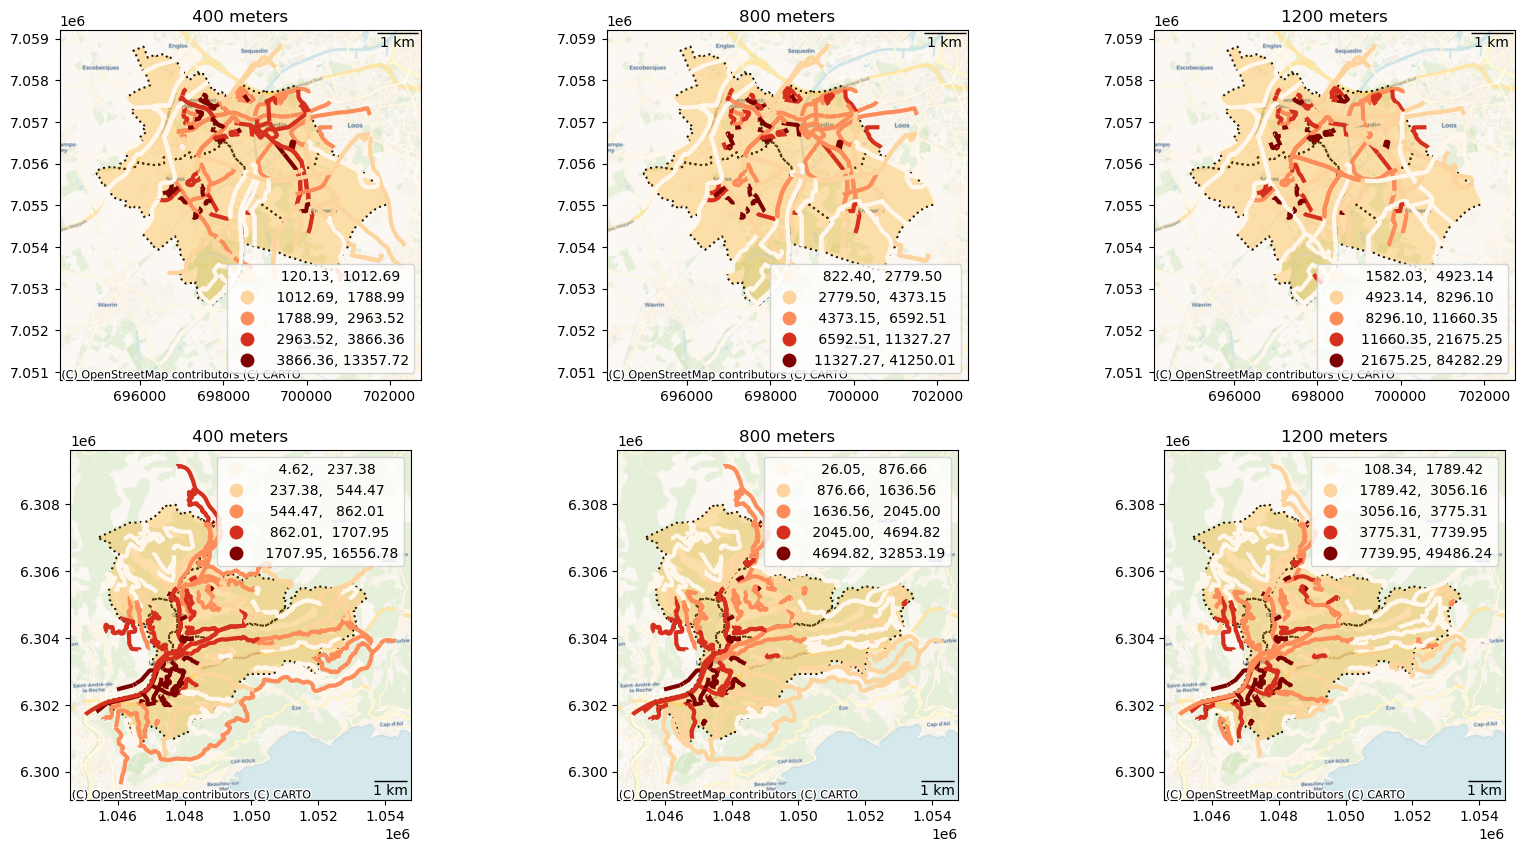

In [13]:
# Appendix A5 : Catchment area results (weighted)

# Create custom legend handles
legend_handles = [
    Line2D([0], [0], color='black', lw=2, label='Municipality limits', linestyle='dotted'),  # For municipality limits
    Rectangle((0, 0), 1, 1, color='orange', ec='none', label='Test area', alpha=0.3),
]

# Plot road_clean on the same map
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 10))

# Plot first map
road_pop.plot(ax=ax1, linewidth=3, column='temp400', cmap='OrRd', legend=True, scheme='quantiles', legend_kwds={'loc': 'lower right'})
administrative.plot(ax=ax1, facecolor='none', edgecolor='black', linestyle='dotted', linewidth=1.5)
administrative.plot(ax=ax1, color='orange', alpha=0.3)
scalebar1 = AnchoredSizeBar(ax1.transData, 1000, '1 km', 'upper right', frameon=False)
ax1.add_artist(scalebar1)
contextily.add_basemap(ax1, crs=road.crs, source=contextily.providers.CartoDB.Voyager)
ax1.set_title('400 meters')  # Add title for the first map

# Plot second map
road_pop.plot(ax=ax2, linewidth=3, column='temp800', cmap='OrRd', legend=True, scheme='quantiles', legend_kwds={'loc': 'lower right'})
administrative.plot(ax=ax2, facecolor='none', edgecolor='black', linestyle='dotted', linewidth=1.5)
administrative.plot(ax=ax2, color='orange', alpha=0.3)
scalebar2 = AnchoredSizeBar(ax2.transData, 1000, '1 km', 'upper right', frameon=False)
ax2.add_artist(scalebar2)
contextily.add_basemap(ax2, crs=road.crs, source=contextily.providers.CartoDB.Voyager)
ax2.set_title('800 meters')  # Add title for the second map

# Plot third map
road_pop.plot(ax=ax3, linewidth=3, column='temp1200', cmap='OrRd', legend=True, scheme='quantiles', legend_kwds={'loc': 'lower right'})
administrative.plot(ax=ax3, facecolor='none', edgecolor='black', linestyle='dotted', linewidth=1.5)
administrative.plot(ax=ax3, color='orange', alpha=0.3)
scalebar3 = AnchoredSizeBar(ax3.transData, 1000, '1 km', 'upper right', frameon=False)
ax3.add_artist(scalebar3)
contextily.add_basemap(ax3, crs=road.crs, source=contextily.providers.CartoDB.Voyager)
ax3.set_title('1200 meters')  # Add title for the third map

# Plot fourth map
road_pop2.plot(ax=ax4, linewidth=3, column='temp400', cmap='OrRd', legend=True, scheme='quantiles')
administrative2.plot(ax=ax4, facecolor='none', edgecolor='black', linestyle='dotted', linewidth=1.5)
administrative2.plot(ax=ax4, color='orange', alpha=0.3)
scalebar1 = AnchoredSizeBar(ax4.transData, 1000, '1 km', 'lower right', frameon=False)
ax4.add_artist(scalebar1)
contextily.add_basemap(ax4, crs=road.crs, source=contextily.providers.CartoDB.Voyager)
ax4.set_title('400 meters')  # Add title for the first map

# Plot fifth map
road_pop2.plot(ax=ax5, linewidth=3, column='temp800', cmap='OrRd', legend=True, scheme='quantiles')
administrative2.plot(ax=ax5, facecolor='none', edgecolor='black', linestyle='dotted', linewidth=1.5)
administrative2.plot(ax=ax5, color='orange', alpha=0.3)
scalebar2 = AnchoredSizeBar(ax5.transData, 1000, '1 km', 'lower right', frameon=False)
ax5.add_artist(scalebar2)
contextily.add_basemap(ax5, crs=road.crs, source=contextily.providers.CartoDB.Voyager)
ax5.set_title('800 meters')

# Plot map number six
road_pop2.plot(ax=ax6, linewidth=3, column='temp1200', cmap='OrRd', legend=True, scheme='quantiles')
administrative2.plot(ax=ax6, facecolor='none', edgecolor='black', linestyle='dotted', linewidth=1.5)
administrative2.plot(ax=ax6, color='orange', alpha=0.3)
scalebar3 = AnchoredSizeBar(ax6.transData, 1000, '1 km', 'lower right', frameon=False)
ax6.add_artist(scalebar3)
contextily.add_basemap(ax6, crs=road.crs, source=contextily.providers.CartoDB.Voyager)
ax6.set_title('1200 meters')

# Show the plot
plt.show()